In [1]:
from PIL import Image

In [2]:
import os
cws = os.getcwd()

In [3]:
import numpy as np


In [4]:
im = np.array(Image.open("/home/ideree/Pictures/blabla.png"))

In [5]:
im.shape

(1080, 1920, 4)

In [6]:
data = np.asarray(im)

In [7]:
data[:,:,2]

array([[7, 7, 7, ..., 7, 7, 7],
       [7, 7, 7, ..., 7, 7, 7],
       [7, 7, 7, ..., 7, 7, 7],
       ...,
       [7, 7, 7, ..., 7, 7, 7],
       [7, 7, 7, ..., 7, 7, 7],
       [7, 7, 7, ..., 7, 7, 7]], dtype=uint8)

In [8]:
#convolution 

In [9]:
input = [1, 2, 3, 4, 5]
kernel = [2, 2, -1]

In [10]:
def pading(a,b):
    tmp = len(b) - 1
    front = [0] * (tmp//2)
    back = [0] * (tmp - (tmp//2))
    return front + a + back

In [11]:
len(kernel)

3

In [12]:
padded = pading(input, kernel)

In [13]:
convolution=[]
for i in range (len(input)):
    sum = 0 
    for j in range(len(kernel)):
        sum+=padded[i+j]*kernel[j]
    convolution+=[sum]

In [14]:
convolution

[0, 3, 6, 9, 18]

In [15]:
a = np.array(input)
b = np.array(kernel)

In [16]:
np.multiply(a[0:3],b)

array([ 2,  4, -3])

In [17]:
np.sum(a)

15

In [18]:
g=[]
for i in range(len(a) - len(b)+1):
    tmp = np.multiply(a[i:i+len(b)],b)
    g+=[np.sum(tmp)]

In [19]:
g

[3, 6, 9]

In [20]:
a[0:3]*b

array([ 2,  4, -3])

In [21]:
#image first channel 2D convolution

In [22]:
kernel2d= np.array([[0, -1, 0],[-1, 5, -1],[0,-1,0]])
#Sharpen 

In [23]:
kernel2d

array([[ 0, -1,  0],
       [-1,  5, -1],
       [ 0, -1,  0]])

In [24]:
def pading2d(a,b):
    pass

In [25]:
r,g,b =data[:,:,0],data[:,:,1], data[:,:,2]
height = len(kernel2d)
width = len(kernel2d[0])
blurredr= np.copy(r)
blurredg= np.copy(g)
blurredb= np.copy(b)
for i in range(len(r)-height+1):
    for j in range(len(r[0])-width+1):
        blurredr[i][j]=\
            np.sum(r[i:i+height, j:j+width]*kernel2d)
        blurredg[i][j]=\
            np.sum(g[i:i+height, j:j+width]*kernel2d)
        blurredb[i][j]=\
            np.sum(b[i:i+height, j:j+width]*kernel2d)

In [26]:
rgb = np.dstack((r,g,b))

In [44]:
blurred=np.dstack((blurredr, blurredg, blurredb))

In [45]:
rgb = np.dstack((r,g,b))

In [46]:
blurred

array([[[5, 4, 7],
        [5, 4, 7],
        [5, 4, 7],
        ...,
        [5, 4, 7],
        [5, 4, 7],
        [5, 4, 7]],

       [[5, 4, 7],
        [5, 4, 7],
        [5, 4, 7],
        ...,
        [5, 4, 7],
        [5, 4, 7],
        [5, 4, 7]],

       [[5, 4, 7],
        [5, 4, 7],
        [5, 4, 7],
        ...,
        [5, 4, 7],
        [5, 4, 7],
        [5, 4, 7]],

       ...,

       [[5, 4, 7],
        [5, 4, 7],
        [5, 4, 7],
        ...,
        [5, 4, 7],
        [5, 4, 7],
        [5, 4, 7]],

       [[5, 4, 7],
        [5, 4, 7],
        [5, 4, 7],
        ...,
        [5, 4, 7],
        [5, 4, 7],
        [5, 4, 7]],

       [[5, 4, 7],
        [5, 4, 7],
        [5, 4, 7],
        ...,
        [5, 4, 7],
        [5, 4, 7],
        [5, 4, 7]]], dtype=uint8)

In [47]:
im = Image.fromarray(np.uint8(blurred))

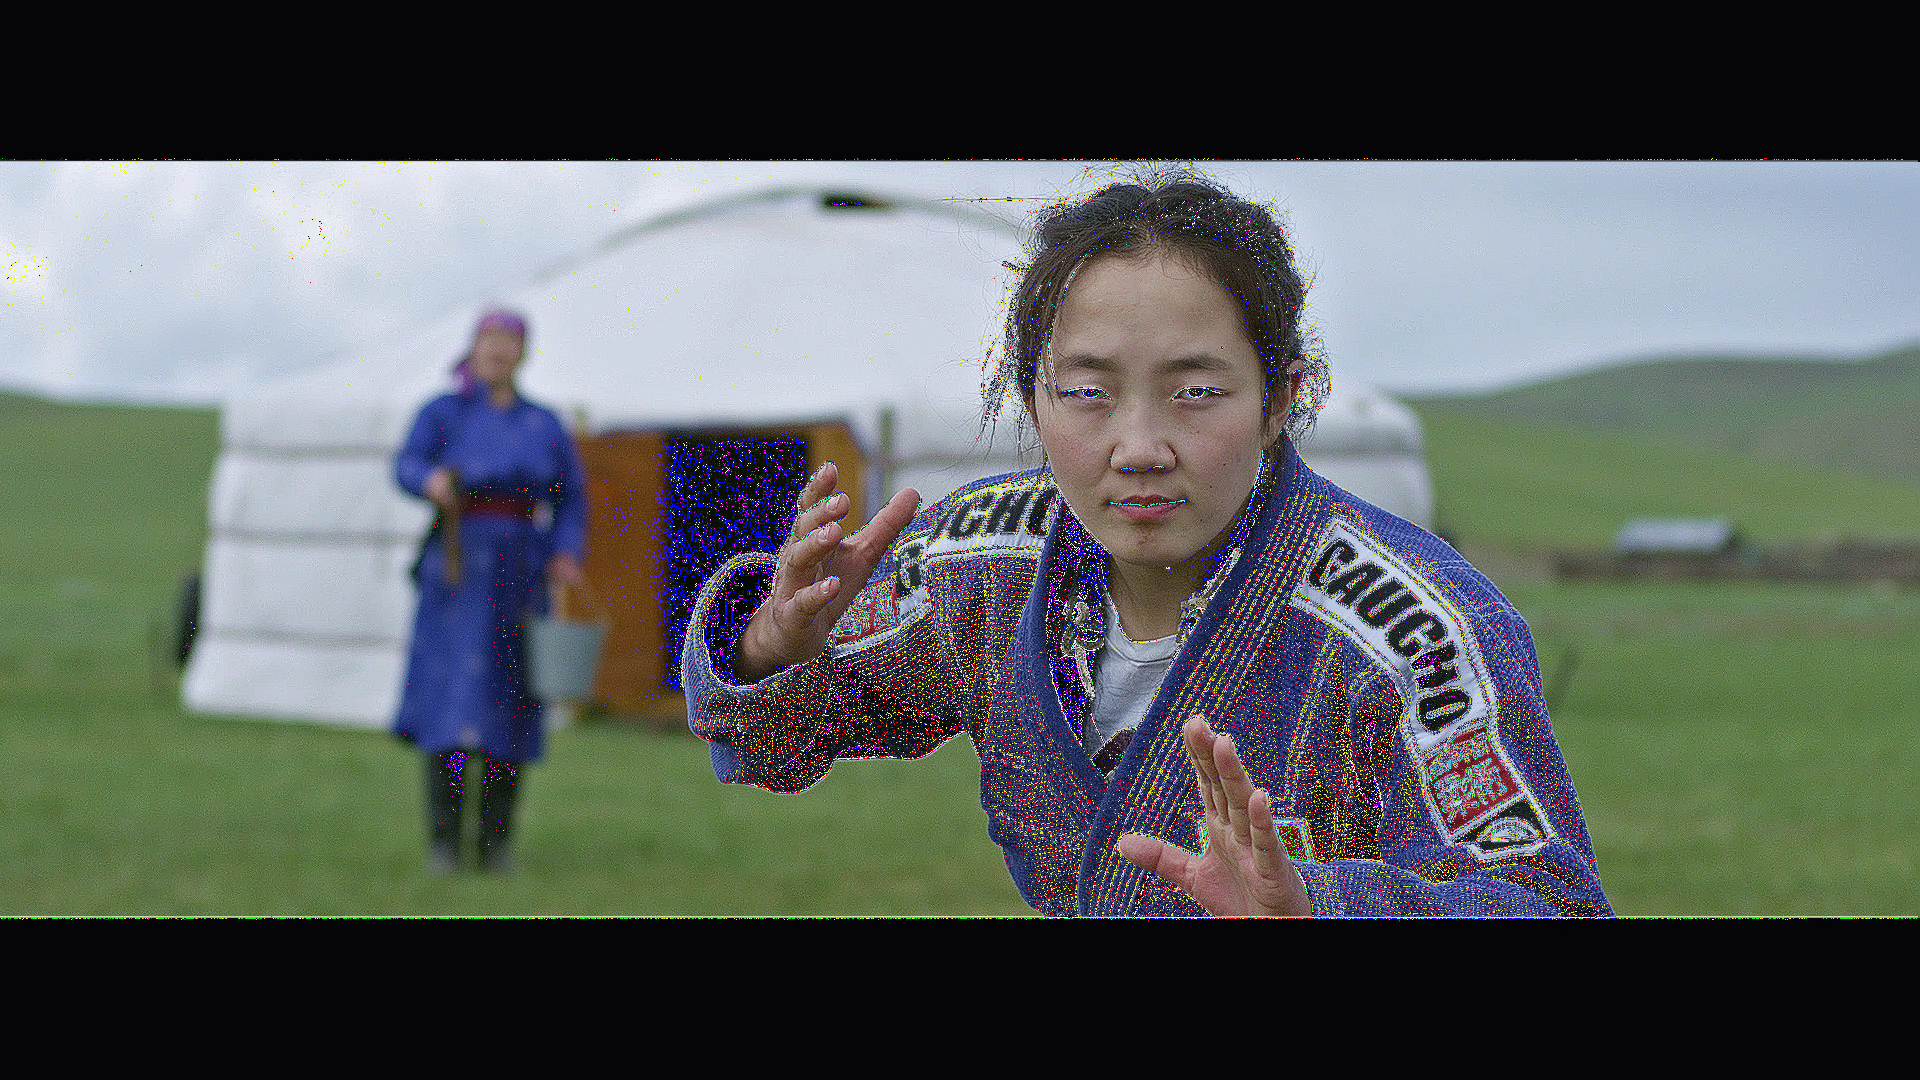

In [48]:
im

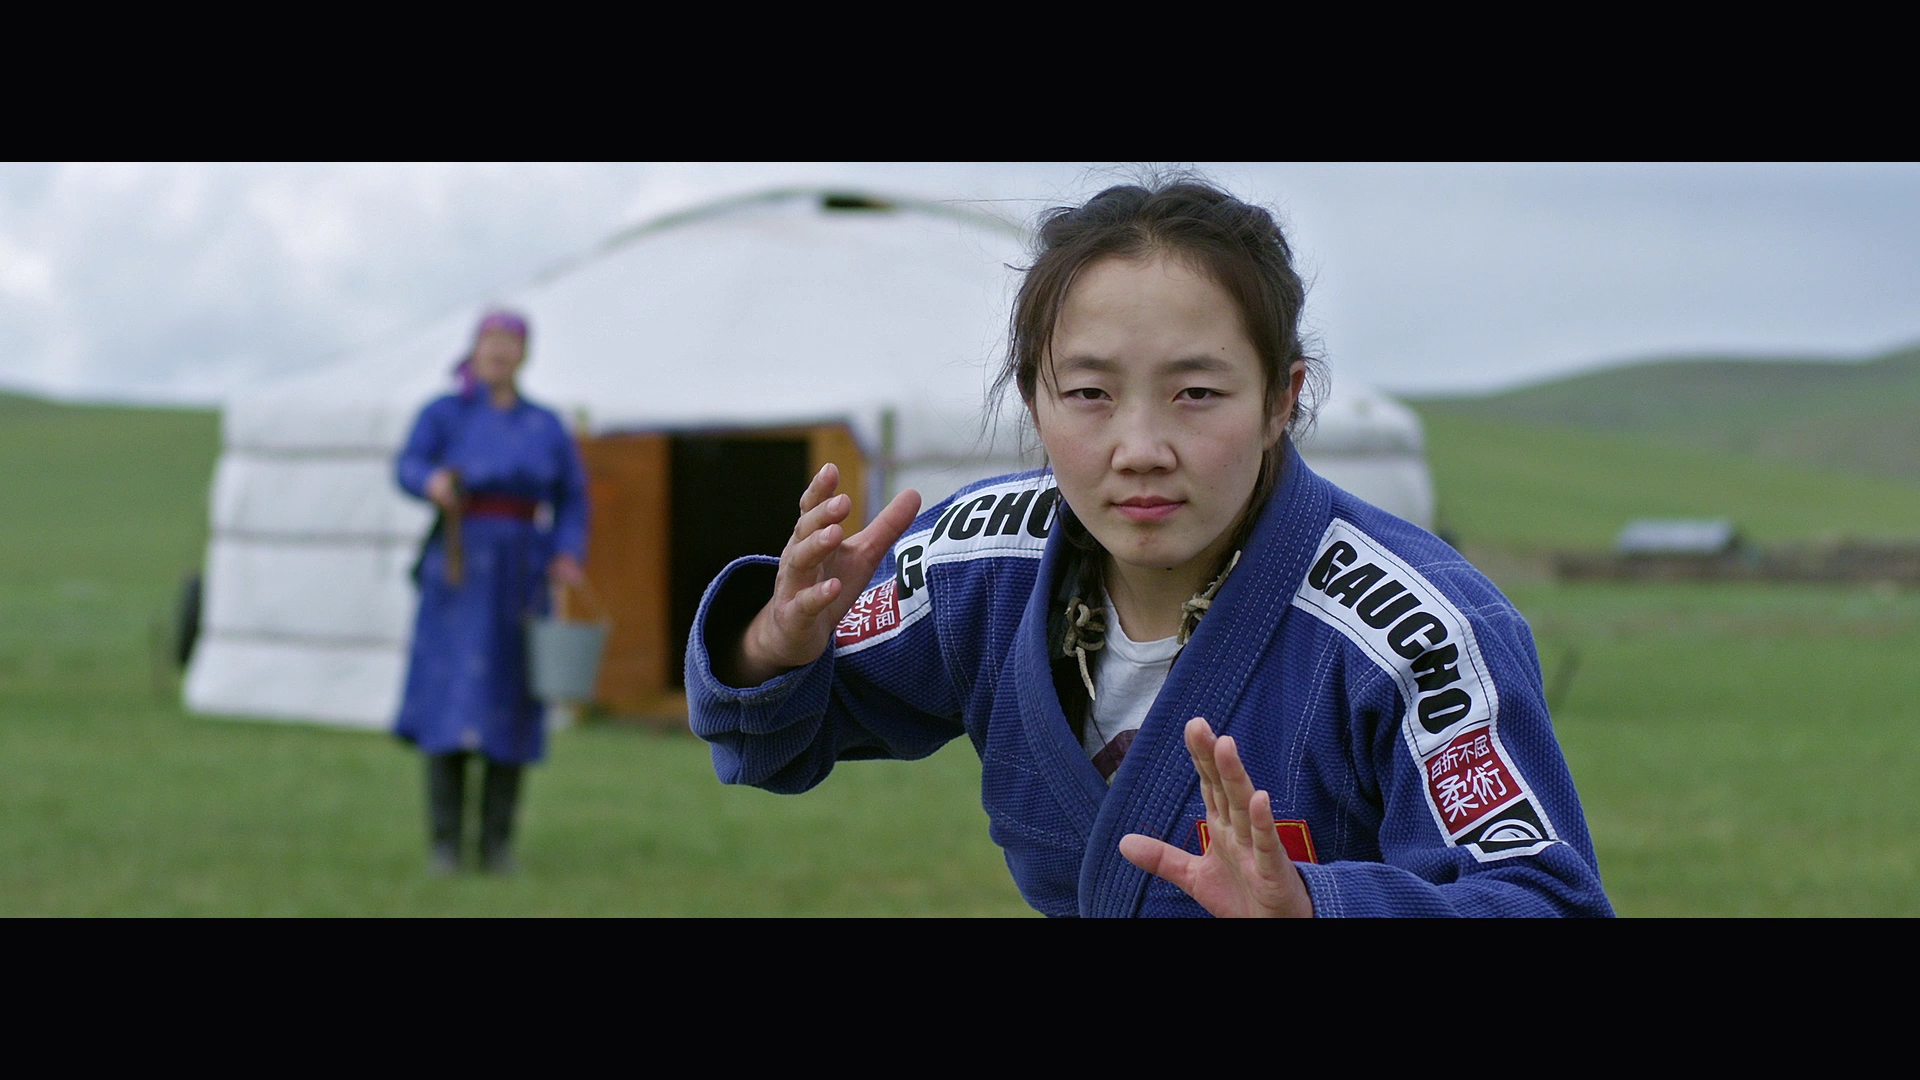

In [49]:
Image.fromarray(np.uint8(rgb))